In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [2]:
# 패션MNIST 데이터셋 로딩 tensorflow에 기본적으로 내장돼있는 이미지들
data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

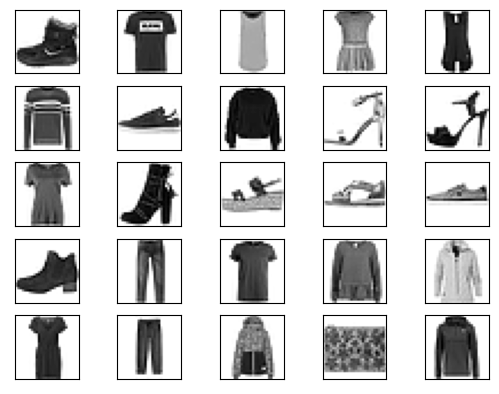

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)

## CNN사용하지 않고 분류해보기

In [4]:
X_train, X_test = X_train /255.0, X_test /255.0

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/20
1875/1875 [==============================] - 9s 3ms/step - loss: 0.5339 - accuracy: 0.8115
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3994 - accuracy: 0.8555
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3656 - accuracy: 0.8654
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3443 - accuracy: 0.8726
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3297 - accuracy: 0.8781
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3213 - accuracy: 0.8806
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3102 - accuracy: 0.8851
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2986 - accuracy: 0.8889
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2935 - accuracy: 0.8900
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.287

[0.3549686074256897, 0.8813999891281128]

# CNN으로 Fashion MNIST 분석하기

In [6]:
X_train.reshape(-1,28, 28, 1).shape

(60000, 28, 28, 1)

In [7]:
X_train_final = X_train.reshape(-1,28, 28, 1) / 255.0
X_test_final = X_test.reshape(-1, 28, 28, 1) / 255.0

In [8]:
X_train_final.shape

(60000, 28, 28, 1)

In [9]:
X_test_final.shape

(10000, 28, 28, 1)

In [10]:
model_with_conv = Sequential()
model_with_conv.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_with_conv.add(MaxPooling2D((2,2), strides=2)) #strides=2는 2칸씩 가라는 뜻. 그러면 더 작게 pooling이 됨.
model_with_conv.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model_with_conv.add(MaxPooling2D((2,2), strides=2))
model_with_conv.add(Flatten())

model_with_conv.add(Dense(128, activation='relu'))
model_with_conv.add(Dense(10, activation='softmax'))
model_with_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

합성곱(Conv2D), 풀링(MaxPooling2D)

In [11]:
model_with_conv.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model_with_conv.fit(X_train_final, y_train, epochs=10)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 16s 5ms/step - loss: 0.7980 - accuracy: 0.7095
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5387 - accuracy: 0.8019
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4625 - accuracy: 0.8328
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4187 - accuracy: 0.8483
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3921 - accuracy: 0.8588
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3680 - accuracy: 0.8662
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3498 - accuracy: 0.8722
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3326 - accuracy: 0.8788
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3172 - accuracy: 0.8837
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

[0.3424001634120941, 0.8758000135421753]

# 전이학습
* 대량의 데이터셋을 이용해서 사전에 학습하고 만들어진 모델의 가중치를 가져와 우리가 원하는 분석에 활용하는 것
* Fine-tuning : 사전 훈련된 모델을 가져와서 커스터마이징 하는 것
* 1) 특성 추출법: 사전 훈련된 모델을 가져온 후에 마지막 완전연결층 부분만 새로 만듦.
  * 합성곱층: 합성곱층과 풀링층으로 구성
  * 완전연결층: 데이터분류기, 추출된 특성을 입력받아 최종적으로 이미지 분류를 수행
  * Xception
  * Inception V3
  * ResNet 50
  * VGG16
  * VGG19
  * MobileNet

### ResNet 50 모델을 사용해서 개와 고양이 분류하기

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.image as mpimg

In [14]:
base_model = ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
                     pooling=None, classes=1000)


In [15]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [16]:
# 우리 모데 추가하기
model.trainable=False
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_4 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 25,585,594
Non-trainable params: 53,120
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelpath = "./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
early_stopping_callback =EarlyStopping(monitor='val_loss', patience=100)

In [18]:
batch_size=16
image_height=224
image_width=224
train_dir = "./data/catanddog/train/"
test_dir = "./data/catanddog/validation/"

In [19]:
# 다양한 이미지 샘플을 만들기 위한 이미지 변형 작업
train = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1
)

train_generator = train.flow_from_directory(train_dir,
                                           target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                            shuffle=True,
                                            class_mode='categorical')
valid = ImageDataGenerator(rescale=1./255.0)
valid_generator = valid.flow_from_directory(test_dir,
                                            target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                            shuffle=True,
                                            class_mode='categorical'
                                           )

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


seed는 rnadom_state의 역할!

In [20]:
history = model.fit(train_generator, epochs=2000, validation_data=valid_generator, verbose=2,
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000

Epoch 1: val_loss improved from inf to 0.69399, saving model to ./model\01-0.5000.hdf5
25/25 - 22s - loss: 0.6844 - accuracy: 0.6519 - val_loss: 0.6940 - val_accuracy: 0.5000 - 22s/epoch - 874ms/step
Epoch 2/2000

Epoch 2: val_loss improved from 0.69399 to 0.69388, saving model to ./model\02-0.5000.hdf5
25/25 - 12s - loss: 0.6911 - accuracy: 0.5455 - val_loss: 0.6939 - val_accuracy: 0.5000 - 12s/epoch - 483ms/step
Epoch 3/2000

Epoch 3: val_loss did not improve from 0.69388
25/25 - 11s - loss: 0.6860 - accuracy: 0.6156 - val_loss: 0.6944 - val_accuracy: 0.5000 - 11s/epoch - 455ms/step
Epoch 4/2000

Epoch 4: val_loss did not improve from 0.69388
25/25 - 11s - loss: 0.6867 - accuracy: 0.5896 - val_loss: 0.6939 - val_accuracy: 0.5000 - 11s/epoch - 453ms/step
Epoch 5/2000

Epoch 5: val_loss did not improve from 0.69388
25/25 - 11s - loss: 0.6897 - accuracy: 0.5299 - val_loss: 0.6952 - val_accuracy: 0.5000 - 11s/epoch - 455ms/step
Epoch 6/2000

Epoch 6: val_loss did not improv

25/25 - 11s - loss: 0.6710 - accuracy: 0.5948 - val_loss: 0.6667 - val_accuracy: 0.6020 - 11s/epoch - 451ms/step
Epoch 46/2000

Epoch 46: val_loss did not improve from 0.66130
25/25 - 11s - loss: 0.6761 - accuracy: 0.5974 - val_loss: 0.6771 - val_accuracy: 0.5816 - 11s/epoch - 453ms/step
Epoch 47/2000

Epoch 47: val_loss did not improve from 0.66130
25/25 - 11s - loss: 0.6662 - accuracy: 0.6052 - val_loss: 0.7051 - val_accuracy: 0.5306 - 11s/epoch - 458ms/step
Epoch 48/2000

Epoch 48: val_loss did not improve from 0.66130
25/25 - 11s - loss: 0.6749 - accuracy: 0.5948 - val_loss: 0.6770 - val_accuracy: 0.6122 - 11s/epoch - 449ms/step
Epoch 49/2000

Epoch 49: val_loss did not improve from 0.66130
25/25 - 11s - loss: 0.6443 - accuracy: 0.6571 - val_loss: 0.7006 - val_accuracy: 0.5306 - 11s/epoch - 451ms/step
Epoch 50/2000

Epoch 50: val_loss did not improve from 0.66130
25/25 - 11s - loss: 0.6499 - accuracy: 0.6416 - val_loss: 0.7141 - val_accuracy: 0.5102 - 11s/epoch - 448ms/step
Epoch 5

Epoch 92/2000

Epoch 92: val_loss did not improve from 0.63772
25/25 - 11s - loss: 0.6432 - accuracy: 0.6494 - val_loss: 0.7133 - val_accuracy: 0.4796 - 11s/epoch - 456ms/step
Epoch 93/2000

Epoch 93: val_loss did not improve from 0.63772
25/25 - 11s - loss: 0.7212 - accuracy: 0.4961 - val_loss: 0.7093 - val_accuracy: 0.5102 - 11s/epoch - 457ms/step
Epoch 94/2000

Epoch 94: val_loss did not improve from 0.63772
25/25 - 11s - loss: 0.6905 - accuracy: 0.5429 - val_loss: 0.7561 - val_accuracy: 0.4694 - 11s/epoch - 457ms/step
Epoch 95/2000

Epoch 95: val_loss did not improve from 0.63772
25/25 - 11s - loss: 0.6644 - accuracy: 0.5922 - val_loss: 0.7343 - val_accuracy: 0.5204 - 11s/epoch - 456ms/step
Epoch 96/2000

Epoch 96: val_loss did not improve from 0.63772
25/25 - 11s - loss: 0.6667 - accuracy: 0.5688 - val_loss: 0.7081 - val_accuracy: 0.5102 - 11s/epoch - 457ms/step
Epoch 97/2000

Epoch 97: val_loss did not improve from 0.63772
25/25 - 11s - loss: 0.6639 - accuracy: 0.5818 - val_loss:

Epoch 138/2000

Epoch 138: val_loss did not improve from 0.63766
25/25 - 11s - loss: 0.6451 - accuracy: 0.6519 - val_loss: 0.6858 - val_accuracy: 0.5306 - 11s/epoch - 457ms/step
Epoch 139/2000

Epoch 139: val_loss did not improve from 0.63766
25/25 - 11s - loss: 0.6960 - accuracy: 0.5922 - val_loss: 0.7865 - val_accuracy: 0.5306 - 11s/epoch - 457ms/step
Epoch 140/2000

Epoch 140: val_loss did not improve from 0.63766
25/25 - 11s - loss: 0.6970 - accuracy: 0.5662 - val_loss: 0.8030 - val_accuracy: 0.5000 - 11s/epoch - 455ms/step
Epoch 141/2000

Epoch 141: val_loss did not improve from 0.63766
25/25 - 11s - loss: 0.7216 - accuracy: 0.5325 - val_loss: 0.7954 - val_accuracy: 0.5000 - 11s/epoch - 455ms/step
Epoch 142/2000

Epoch 142: val_loss did not improve from 0.63766
25/25 - 11s - loss: 0.6939 - accuracy: 0.5818 - val_loss: 0.7768 - val_accuracy: 0.4694 - 11s/epoch - 456ms/step
Epoch 143/2000

Epoch 143: val_loss did not improve from 0.63766
25/25 - 11s - loss: 0.6590 - accuracy: 0.6000

Epoch 184/2000

Epoch 184: val_loss did not improve from 0.62784
25/25 - 11s - loss: 0.6317 - accuracy: 0.6675 - val_loss: 0.7038 - val_accuracy: 0.5204 - 11s/epoch - 457ms/step
Epoch 185/2000

Epoch 185: val_loss did not improve from 0.62784
25/25 - 11s - loss: 0.6242 - accuracy: 0.6701 - val_loss: 0.6625 - val_accuracy: 0.5816 - 11s/epoch - 449ms/step
Epoch 186/2000

Epoch 186: val_loss did not improve from 0.62784
25/25 - 11s - loss: 0.6311 - accuracy: 0.6727 - val_loss: 0.6616 - val_accuracy: 0.5816 - 11s/epoch - 447ms/step
Epoch 187/2000

Epoch 187: val_loss did not improve from 0.62784
25/25 - 11s - loss: 0.6332 - accuracy: 0.6649 - val_loss: 0.6769 - val_accuracy: 0.5714 - 11s/epoch - 447ms/step
Epoch 188/2000

Epoch 188: val_loss did not improve from 0.62784
25/25 - 11s - loss: 0.6358 - accuracy: 0.6519 - val_loss: 0.6371 - val_accuracy: 0.6837 - 11s/epoch - 450ms/step
Epoch 189/2000

Epoch 189: val_loss did not improve from 0.62784
25/25 - 11s - loss: 0.6313 - accuracy: 0.6675

Epoch 230/2000

Epoch 230: val_loss did not improve from 0.62499
25/25 - 11s - loss: 0.5769 - accuracy: 0.7273 - val_loss: 0.6650 - val_accuracy: 0.6122 - 11s/epoch - 447ms/step
Epoch 231/2000

Epoch 231: val_loss did not improve from 0.62499
25/25 - 11s - loss: 0.5821 - accuracy: 0.7117 - val_loss: 0.6259 - val_accuracy: 0.6633 - 11s/epoch - 448ms/step
Epoch 232/2000

Epoch 232: val_loss improved from 0.62499 to 0.61272, saving model to ./model\232-0.6633.hdf5
25/25 - 12s - loss: 0.5722 - accuracy: 0.7299 - val_loss: 0.6127 - val_accuracy: 0.6633 - 12s/epoch - 475ms/step
Epoch 233/2000

Epoch 233: val_loss did not improve from 0.61272
25/25 - 11s - loss: 0.5966 - accuracy: 0.7013 - val_loss: 0.6262 - val_accuracy: 0.6531 - 11s/epoch - 443ms/step
Epoch 234/2000

Epoch 234: val_loss did not improve from 0.61272
25/25 - 11s - loss: 0.5729 - accuracy: 0.7273 - val_loss: 0.6155 - val_accuracy: 0.6837 - 11s/epoch - 444ms/step
Epoch 235/2000

Epoch 235: val_loss did not improve from 0.61272



Epoch 275: val_loss did not improve from 0.59209
25/25 - 11s - loss: 0.5989 - accuracy: 0.6883 - val_loss: 0.7998 - val_accuracy: 0.5000 - 11s/epoch - 457ms/step
Epoch 276/2000

Epoch 276: val_loss did not improve from 0.59209
25/25 - 11s - loss: 0.5919 - accuracy: 0.7013 - val_loss: 0.6780 - val_accuracy: 0.6224 - 11s/epoch - 457ms/step
Epoch 277/2000

Epoch 277: val_loss did not improve from 0.59209
25/25 - 11s - loss: 0.5949 - accuracy: 0.6987 - val_loss: 0.6891 - val_accuracy: 0.6020 - 11s/epoch - 453ms/step
Epoch 278/2000

Epoch 278: val_loss did not improve from 0.59209
25/25 - 11s - loss: 0.5725 - accuracy: 0.7039 - val_loss: 0.6983 - val_accuracy: 0.5816 - 11s/epoch - 451ms/step
Epoch 279/2000

Epoch 279: val_loss did not improve from 0.59209
25/25 - 11s - loss: 0.5805 - accuracy: 0.7065 - val_loss: 0.6638 - val_accuracy: 0.5918 - 11s/epoch - 457ms/step
Epoch 280/2000

Epoch 280: val_loss did not improve from 0.59209
25/25 - 11s - loss: 0.5570 - accuracy: 0.7377 - val_loss: 0.

25/25 - 40s - loss: 0.4191 - accuracy: 0.8442 - val_loss: 0.5444 - val_accuracy: 0.7449 - 40s/epoch - 2s/step
Epoch 322/2000

Epoch 322: val_loss did not improve from 0.54443
25/25 - 39s - loss: 0.4598 - accuracy: 0.8078 - val_loss: 0.7784 - val_accuracy: 0.6020 - 39s/epoch - 2s/step
Epoch 323/2000

Epoch 323: val_loss did not improve from 0.54443
25/25 - 39s - loss: 0.4418 - accuracy: 0.8286 - val_loss: 0.9055 - val_accuracy: 0.5510 - 39s/epoch - 2s/step
Epoch 324/2000

Epoch 324: val_loss did not improve from 0.54443
25/25 - 39s - loss: 0.4535 - accuracy: 0.8156 - val_loss: 0.8610 - val_accuracy: 0.5714 - 39s/epoch - 2s/step
Epoch 325/2000

Epoch 325: val_loss did not improve from 0.54443
25/25 - 39s - loss: 0.4434 - accuracy: 0.8130 - val_loss: 0.8231 - val_accuracy: 0.6122 - 39s/epoch - 2s/step
Epoch 326/2000

Epoch 326: val_loss did not improve from 0.54443
25/25 - 39s - loss: 0.4303 - accuracy: 0.8234 - val_loss: 0.7153 - val_accuracy: 0.6633 - 39s/epoch - 2s/step
Epoch 327/2000


25/25 - 39s - loss: 0.3452 - accuracy: 0.8857 - val_loss: 0.6838 - val_accuracy: 0.6531 - 39s/epoch - 2s/step
Epoch 369/2000

Epoch 369: val_loss did not improve from 0.54443
25/25 - 39s - loss: 0.3796 - accuracy: 0.8623 - val_loss: 0.7234 - val_accuracy: 0.6327 - 39s/epoch - 2s/step
Epoch 370/2000

Epoch 370: val_loss did not improve from 0.54443
25/25 - 39s - loss: 0.3379 - accuracy: 0.8831 - val_loss: 0.7097 - val_accuracy: 0.6531 - 39s/epoch - 2s/step
Epoch 371/2000

Epoch 371: val_loss did not improve from 0.54443
25/25 - 39s - loss: 0.3005 - accuracy: 0.9117 - val_loss: 0.7299 - val_accuracy: 0.6327 - 39s/epoch - 2s/step
Epoch 372/2000

Epoch 372: val_loss did not improve from 0.54443
25/25 - 39s - loss: 0.3112 - accuracy: 0.9039 - val_loss: 0.6101 - val_accuracy: 0.7041 - 39s/epoch - 2s/step
Epoch 373/2000

Epoch 373: val_loss did not improve from 0.54443
25/25 - 39s - loss: 0.3290 - accuracy: 0.8987 - val_loss: 0.6416 - val_accuracy: 0.7143 - 39s/epoch - 2s/step
Epoch 374/2000


Epoch 415/2000

Epoch 415: val_loss did not improve from 0.54443
25/25 - 117s - loss: 0.3330 - accuracy: 0.8753 - val_loss: 0.8992 - val_accuracy: 0.6020 - 117s/epoch - 5s/step
Epoch 416/2000

Epoch 416: val_loss did not improve from 0.54443
25/25 - 124s - loss: 0.2794 - accuracy: 0.9169 - val_loss: 1.0651 - val_accuracy: 0.5918 - 124s/epoch - 5s/step
Epoch 417/2000

Epoch 417: val_loss did not improve from 0.54443
25/25 - 117s - loss: 0.3010 - accuracy: 0.8883 - val_loss: 0.7337 - val_accuracy: 0.6224 - 117s/epoch - 5s/step
Epoch 418/2000

Epoch 418: val_loss did not improve from 0.54443
25/25 - 121s - loss: 0.3015 - accuracy: 0.9039 - val_loss: 0.8616 - val_accuracy: 0.5918 - 121s/epoch - 5s/step
Epoch 419/2000

Epoch 419: val_loss did not improve from 0.54443
25/25 - 125s - loss: 0.2718 - accuracy: 0.9091 - val_loss: 0.7994 - val_accuracy: 0.5918 - 125s/epoch - 5s/step
Epoch 420/2000

Epoch 420: val_loss did not improve from 0.54443
25/25 - 120s - loss: 0.2648 - accuracy: 0.9143 - v

In [21]:
import matplotlib as mpl
import koreanize_matplotlib

Text(0.5, 1.0, '오차')

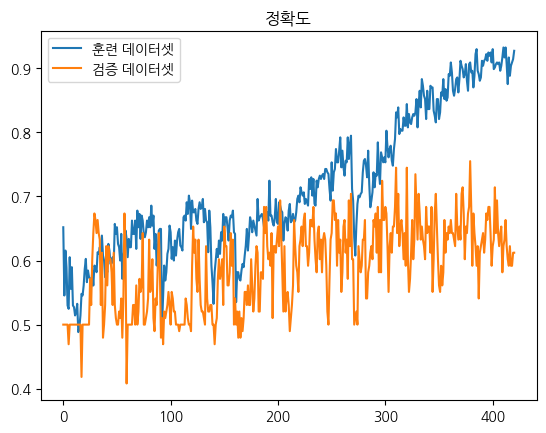

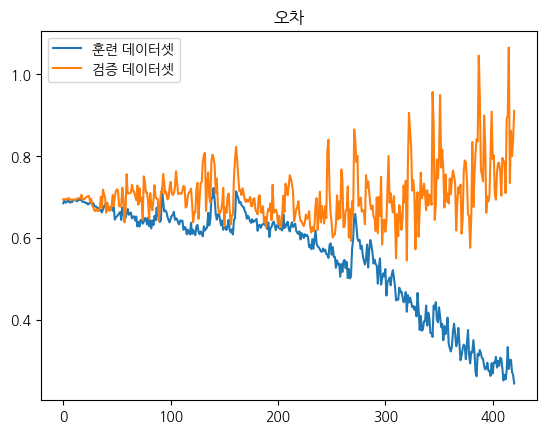

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')


1/1 [==============================] - 0s 47ms/step


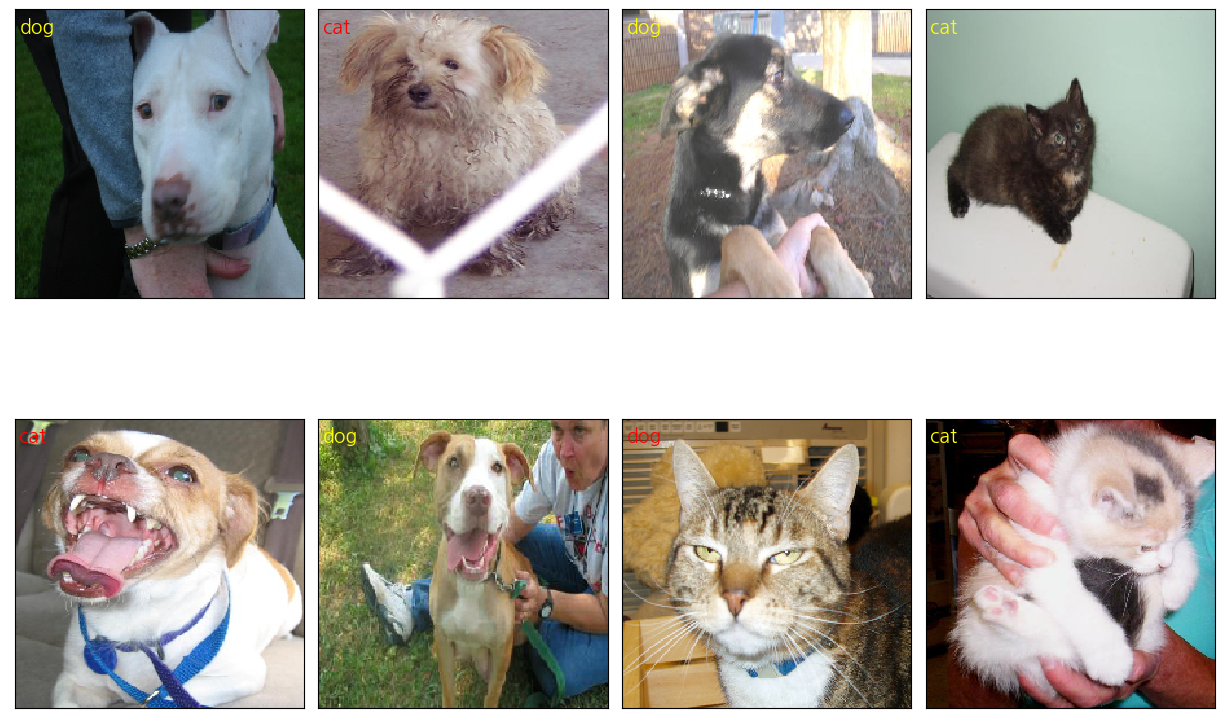

In [24]:
class_names = ['cat','dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i +1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

# 텐서플로우 허브에서 모델 가져와 사용하기

In [25]:
import tensorflow_hub as hub
model = tf.keras.Sequential()
model.add(hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False))
model.add(Dense(2, activation='softmax'))

In [26]:
# 다양한 이미지 샘플을 만들기 위한 이미지 변형 작업
train = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                           target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                            shuffle=True,
                                            class_mode='categorical')
valid = ImageDataGenerator(rescale=1./255.0)
valid_generator = valid.flow_from_directory(test_dir,
                                            target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                            shuffle=True,
                                            class_mode='categorical')

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelpath = "./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
early_stopping_callback =EarlyStopping(monitor='val_loss', patience=5)

In [29]:
history = model.fit(train_generator, epochs=5, validation_data=valid_generator, verbose=2,
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/5

Epoch 1: val_loss improved from 0.06282 to 0.03885, saving model to ./model\01-0.9898.hdf5
25/25 - 31s - loss: 0.0391 - accuracy: 0.9870 - val_loss: 0.0389 - val_accuracy: 0.9898 - 31s/epoch - 1s/step
Epoch 2/5

Epoch 2: val_loss improved from 0.03885 to 0.03703, saving model to ./model\02-0.9898.hdf5
25/25 - 31s - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0370 - val_accuracy: 0.9898 - 31s/epoch - 1s/step
Epoch 3/5

Epoch 3: val_loss did not improve from 0.03703
25/25 - 30s - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0414 - val_accuracy: 0.9796 - 30s/epoch - 1s/step
Epoch 4/5

Epoch 4: val_loss improved from 0.03703 to 0.03096, saving model to ./model\04-0.9898.hdf5
25/25 - 31s - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9898 - 31s/epoch - 1s/step
Epoch 5/5

Epoch 5: val_loss improved from 0.03096 to 0.03006, saving model to ./model\05-0.9898.hdf5
25/25 - 31s - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 0.9898 - 31s/

1/1 [==============================] - 2s 2s/step


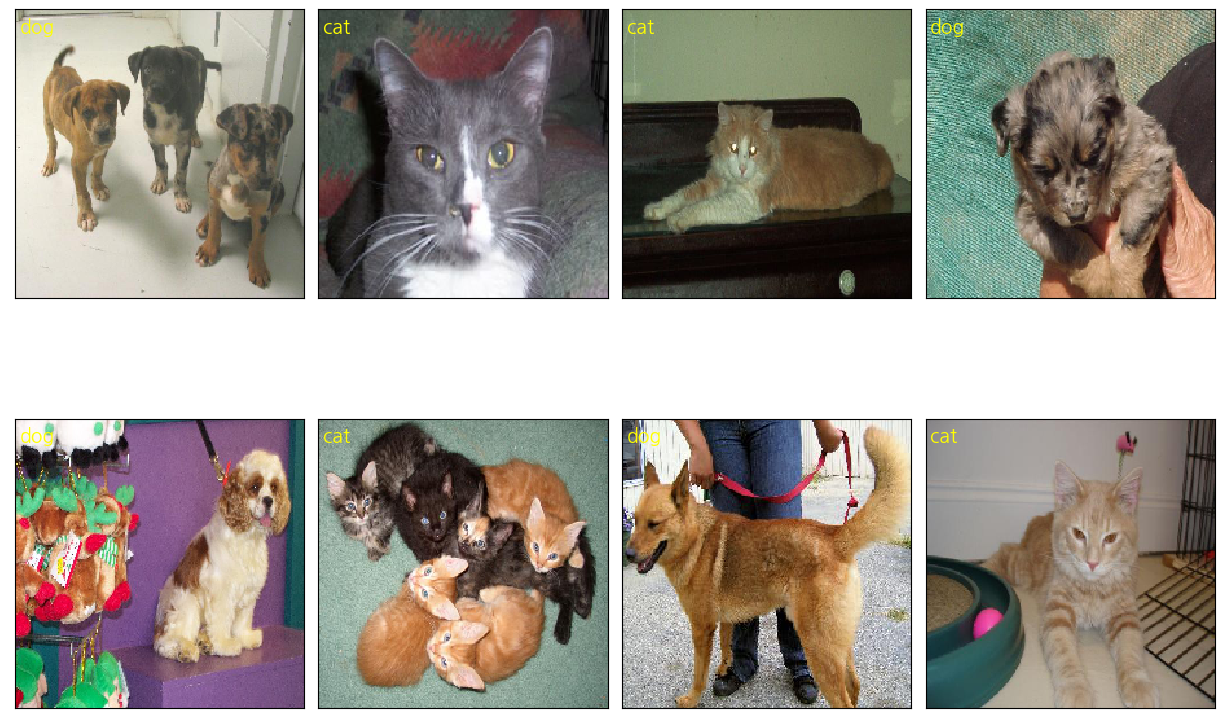

In [30]:
class_names = ['cat','dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i +1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)